#The Rise and Fall of the US Employment-Population Ratio

A research project at NYU's Stern School of Business
Written by David Cai, txc202@nyu.edu, under the direction of David Backus
July 2015 

## Abstract

After the Great Recession, while the unemployment rate has almost returned to pre-2007 levels, the employment-population ratio has not made a similar recovery. I explore the roles of aging and other effects on employment by examining the labor force participation rate, a similar indicator that is less sensitive to cyclical variation. I also decompose the employment-population ratio into specific demographic groups to explore their contributions to the overall change.

## The Employment-Population Ratio and the Unemployment Rate

Historically, for more over two decades from 1989 to 2010, the employment-population ratio has generally moved in line with the unemployment rate, albeit in an inverse direction (Figure 1). However, from 2011 onwards, these two indicators have begun to diverge. Despite the unemployment rate improving to almost pre-recession levels, the employment-population ratio has failed to increase by the same amount. This finding indicates that past 2011, some component of the employment-population ratio other than the unemployment rate must have changed. 

Mathematically, the employment-population ratio can be decomposed into the product of the labor force participation rate and the employment rate of the labor force. Alternatively, the employment-population ratio can be represented as the labor force participation rate multiplied by one minus the unemployment rate. Since the unemployment rate before the crisis has been roughly equal to its level today, the change in the labor force participation rate represents the largest contribution to the decline in the employment-population ratio.

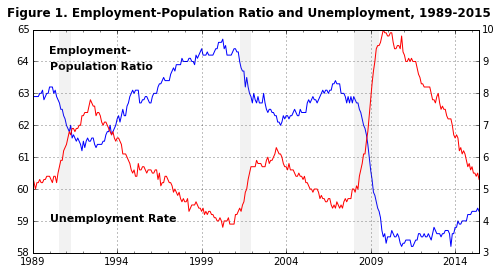

In [1]:
"""
Creates a figure using FRED data
Uses pandas Remote Data Access API
Documentation can be found at http://pandas.pydata.org/pandas-docs/stable/remote_data.html
"""

%matplotlib inline
import pandas as pd
import pandas.io.data as web
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta

start, end = dt.datetime(1989, 1, 1), dt.datetime(2015, 6, 1) # Set the date range of the data
data = web.DataReader(['EMRATIO', 'UNRATE', 'USREC'],'fred', start, end) # Choose data series you wish to download
data.columns = ['Empl Pop Ratio', 'Unemployment Rate', 'Recession'] 
plt.figure(figsize=plt.figaspect(0.5))

data['Empl Pop Ratio'].plot()
plt.xlabel('')
plt.text(dt.datetime(1990, 1, 1), 64.25, 'Employment-', fontsize=11, weight='bold')
plt.text(dt.datetime(1990, 1, 1), 63.75, 'Population Ratio', fontsize=11, weight='bold')

data['Unemployment Rate'].plot(secondary_y=True, color = 'r')
plt.text(dt.datetime(1990, 1, 1), 4, 'Unemployment Rate', fontsize=11, weight='bold')

def get_recession_months():
    rec_dates = data['Recession']
    one_vals = np.where(rec_dates == 1) 
    rec_startind = rec_dates.index[one_vals]
    return rec_startind

def shade_recession(dates):
    for date in dates:
        plt.axvspan(date, date+relativedelta(months=+1), color='gray', alpha=0.1, lw=0)
    
shade_recession(get_recession_months())

plt.suptitle('Figure 1. Employment-Population Ratio and Unemployment, 1989-2015', fontsize=12, weight='bold')
plt.show()

Source: Figure created using data from the Bureau of Labor Statistics (BLS) accessed through the Federal Reserve Economic Data (FRED). This graph is updated from Moffitt (2012)’s Figure 2. Recession data is from NBER accessed through FRED.

## Labor Force Participation

Since 1976, the labor force participation rate has trended upwards until hitting a peak around 2000 (Figure 2). Aaronson et al. (2006) note that this trend can be extended back to the early 1960s, with labor force participation rising from less than 60 percent its peak of 67.3 percent in 2000. After 2000, a reversal of the previous trend emerged, with a new trend of labor force decline until today. Aaronson et al. point out that a prolonged decline in labor force participation is unprecedented in the postwar era, thus leading observers to wonder if long-term structural changes in the labor market have occurred.

After the publication of the 2006 paper, the labor force participation rate has continued to fall. Revisiting this issue, Aaronson et al. (2014) examine the decline in labor force participation from 2007 onwards. They attempt to break down the factors contributing to this decline into structural and cyclical components. The authors find that 1.3 percent, or nearly one half, of the 2.8 percent decline in the aggregate participation rate can be attributable population aging. Moreover, they note the contributions of declines in specific age/sex categories, such as among youth and adult men. Finally, they discover the existence of a cyclical component; however, its magnitude is much more uncertain. Of these three components, population aging represents the largest contributor to the labor force participation decline.

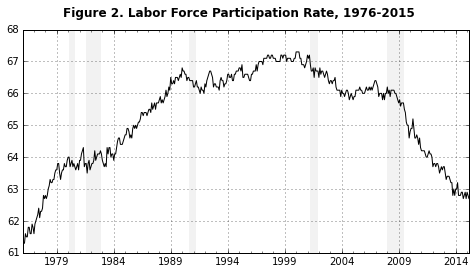

In [2]:
start, end = dt.datetime(1976, 1, 1), dt.datetime(2015, 3, 1)
data = web.DataReader(['CIVPART', 'USREC'], 'fred', start, end)
data.columns = ['LFPR', 'Recession']
plt.figure(figsize=plt.figaspect(0.5))
data['LFPR'].plot(color = 'k')
plt.xlabel('')
shade_recession(get_recession_months())
plt.suptitle('Figure 2. Labor Force Participation Rate, 1976-2015', fontsize=12, fontweight='bold')
plt.show()

Source: Figure created using data from the Bureau of Labor Statistics (BLS) accessed through the Federal Reserve Economic Data (FRED). This graph is adapted from Aaronson et al. (2014)’s Figure 9. Recession data is from NBER accessed through FRED.

###Changes in the Age Distribution

As population aging is the largest contributor to the labor force participation decline, further analysis is necessary to understand its nature. Aaronson et al. (2014) observe that the proportion of the working age population reported as retired in the Current Population Survey (CPS) has increased by more than one percent in 2014 compared to 2007, accounting for the majority of the 1.3 percent effect of aging. The authors argue that this change is the result of a shift of the age distribution of the population, as the leading edge of the baby boom generation reaches age 62. However, on the contrary, within-age participation rates have increased since 2007, making a positive contribution to total labor force participation (Figure 3). Aaronson et al. (2014) make a similar finding, observing that within-age retirement rates have decreased, likely due to changes in social security and pensions, increased education levels, and longer life spans. These same factors can also explain the increase in the within-age participation rates among older cohorts. That said, the most important implication of Figure 3 is that labor force participation rates decrease with age. As the population age distribution shifts towards older ages, overall labor force participation can be expected to decrease.

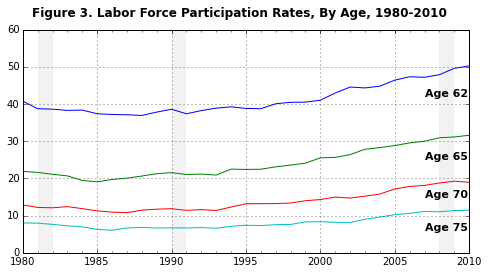

In [3]:
#file = '/Users/davidcai/lfpr.csv'
file = 'https://raw.githubusercontent.com/DaveBackus/Data_Bootcamp/master/Code/Projects/lfpr.csv'
df = pd.read_csv(file, index_col=0)

start, end = dt.datetime(1980, 1, 1), dt.datetime(2010, 1, 1)
data = web.DataReader('USREC', 'fred', start, end)
data.columns=['Recession']

# Take a simple averages of ratios for men and women
df["Age 62"] = df[["M62-64", "W62-64"]].mean(axis=1)
df["Age 65"] = df[["M65-69", "W65-69"]].mean(axis=1)
df["Age 70"] = df[["M70-74", "W70-74"]].mean(axis=1)
df["Age 75"] = df[["M75-79", "W75-79"]].mean(axis=1)

# Convert years into datetime series
df.index = df.index.astype(str) + "-1-1"
df.index = pd.to_datetime(df.index)
plt.figure(figsize=(plt.figaspect(0.5)))

df["Age 62"].plot()
df["Age 65"].plot()
df["Age 70"].plot()
df["Age 75"].plot()

plt.text(dt.datetime(2007, 1, 1), 42, 'Age 62', fontsize=11, weight='bold')
plt.text(dt.datetime(2007, 1, 1), 25, 'Age 65', fontsize=11, weight='bold')
plt.text(dt.datetime(2007, 1, 1), 15, 'Age 70', fontsize=11, weight='bold')
plt.text(dt.datetime(2007, 1, 1), 6, 'Age 75', fontsize=11, weight='bold')

shade_recession(get_recession_months())

plt.suptitle('Figure 3. Labor Force Participation Rates, By Age, 1980-2010', fontsize=12, fontweight='bold')
plt.show()

Source: Figure created using author's calculations, working on calculations from Leonesio et al. (2012), available at http://www.ssa.gov/policy/docs/ssb/v72n1/v72n1p59-text.html#chart1. Data is originally from Current Population Survey (CPS) monthly files. Recession data is from NBER accessed through FRED.

Notes: I employ a oversimplification by taking a simple average of male and female participation rates to determine overall participation rates.

##Demographic Specific Employment Trends

In addition to examining the contribution of the labor force participation rate in order to explain the decline in the employment-population ratio, an alternative approach is possible. Moffitt (2012) decomposes the aggregate employment-population ratio into contributions from specific demographic groups. After breaking down the overall employment population ratio into ratios for men and women, Moffitt observes different employment trends between the sexes (Figure 4). For men, he notes, on average, the ratio declined from 1970 to 1983, remained constant from 1983 to 2000, and continued to fall from 2000 onwards. For women, the ratio increased from 1970 to 2000 but began to decrease from 2000 onwards. Moffitt observes that men's wages declined from 1999-2007 while women's wages increased over the same period, which may account for differences in their employment trends. Moffitt concludes that while that "about half of the decline [in participation rate] among men can be explained by declines in wage rates and by changes in nonlabor income and family structure,” the factors contributing to the employment decline among women are less clear. Moreover, after considering other proposed factors as taxes and government transfers, Moffitt finds their contributions insignificant and unlikely to explain the employment decline.

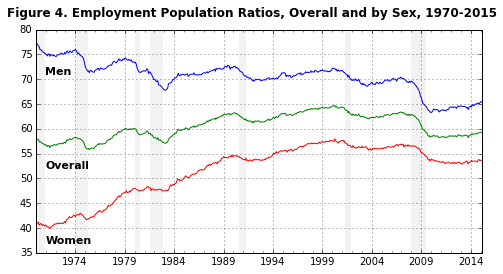

In [4]:
start, end = dt.datetime(1970, 1, 1), dt.datetime(2015, 3, 1)
data = web.DataReader(['LNS12300001', 'EMRATIO','LNS12300002', 'USREC'], 'fred', start, end)
data.columns=['Men', 'Overall', 'Women', 'Recession']
plt.figure(figsize=plt.figaspect(0.5))

data["Men"].plot()
data["Overall"].plot()
data["Women"].plot()
plt.xlabel('')

plt.text(dt.datetime(1971, 1, 1), 71, 'Men', fontsize=11, weight='bold')
plt.text(dt.datetime(1971, 1, 1), 52, 'Overall', fontsize=11, weight='bold')
plt.text(dt.datetime(1971, 1, 1), 37, 'Women', fontsize=11, weight='bold')

shade_recession(get_recession_months())

plt.suptitle('Figure 4. Employment Population Ratios, Overall and by Sex, 1970-2015', fontsize=12, fontweight='bold')
plt.show()

Source: Figure created using data from the Bureau of Labor Statistics (BLS) accessed through the Federal Reserve Economic Data (FRED). This graph is updated from Moffitt (2012)’s Figure 1. Recession data is from NBER accessed through FRED.

## Conclusion

Despite ongoing research, the decline in the employment-population ratio is still not well understood. Since the employment-population ratio can be broken down into the product of the labor participation rate and one minus the unemployment rate, a change in the employment-population ratio can be attributed to contributions from either or both of the two components. Six years after the end of the Great Recession, the unemployment rate has almost recovered fully while the employment-population ratio has failed to keep pace. This finding indicates that the majority of the decline in the employment-population ratio since 2007 can be attributed to contributions from changes in the labor force participation rate, which has led researchers to concentrate on this area.

Studying recent trends in the labor force participation rate, Aaronson et al. (2014) argue that nearly one half of the decline can be attributed to population aging. Of the rest, economists have separated the remaining component into cyclical and residual factors. Mofitt (2012) took an alternate approach in explaining the change in the employment-population ratio by studying employment trends in different age-sex groups. He found that a disproportionate amount of the decline could be attributed to less educated and younger groups for both sexes, but that employment trends and reasons for the decline were different between the sexes. While Moffitt chose not to focus on the labor force participation rate, he provides important contributions to the area of residual effects, where much more research is needed.

##References

Aaronson, S., Cajner, T., Fallick, B., Galbis-Reig, F., Smith, C., & Wascher, W. (2014). Labor Force Participation: Recent Developments and Future Prospects. *Brookings Papers on Economic Activity*, 2014(2), 197-275.

Aaronson, S., Fallick, B., Figura, A., Pingle, J. F., & Wascher, W. L. (2006). The recent decline in the labor force participation rate and its implications for potential labor supply. *Brookings Papers on Economic Activity*, 2006(1), 69-154.

Donovan, S. A. (2015). An Overview of the Employment-Population Ratio.

Leonesio, M. V., Bridges, B., Gesumaria, R., & Del Bene, L. (2012). The increasing labor force participation of older workers and its effect on the income of the aged. *Social security bulletin*, 72(1), 59-77.
Chicago	

Moffitt, R. A., DAVIS, S. J., & MAS, A. (2012). The Reversal of the Employment-Population Ratio in the 2000s: Facts and Explanations [with Comments and Disscussion]. *Brookings Papers on Economic Activity*, 201-264.